<h1><b>Stroke Prediction System

<h2><b>Importing the Datasets and the Libraries

<h3><b>Libraries Import

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<h3><b>Dataset Import

In [2]:
df = pd.read_csv('Datasets/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h3><b>Information about Dataset

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.shape

(5110, 12)

<h2><b>Exploring the Data

<h3><b>Stroke number comparison

<AxesSubplot:xlabel='stroke', ylabel='count'>

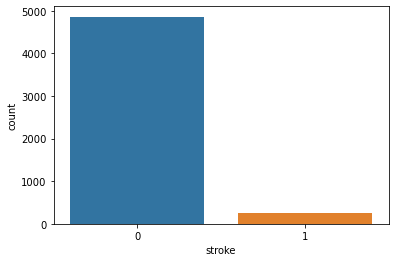

In [6]:
sns.countplot(x = df['stroke'])

<h3><b>Gender Comparison

Text(0.5, 1.0, 'Gender count')

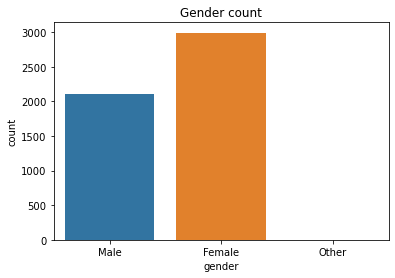

In [7]:
sns.countplot(x = df['gender'])
plt.title('Gender count')

Text(0.5, 1.0, 'Stroke rate in gender')

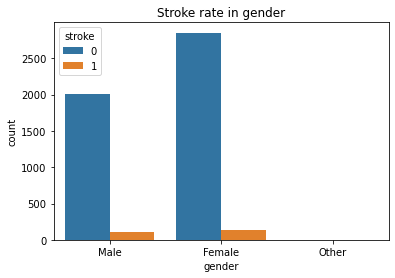

In [8]:
sns.countplot(x=df['gender'],hue=df['stroke'])
plt.title('Stroke rate in gender')

<h3><b>Age Comparison for Strokes

Text(0.5, 1.0, 'Age vs hypertension')

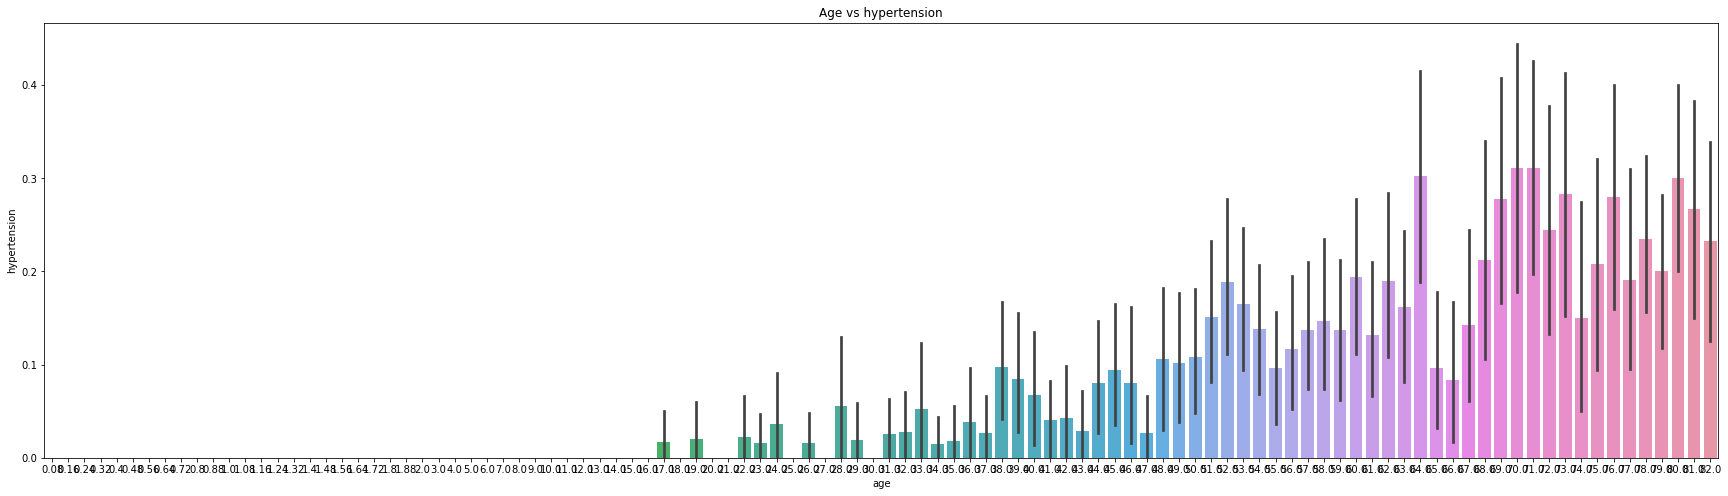

In [9]:
plt.figure(figsize=(30,8))
sns.barplot(x=df['age'],y=df['hypertension'])
plt.title('Age vs hypertension')

<h3><b>Age with Heart Disease COmparison

Text(0.5, 1.0, 'Age vs heart disease')

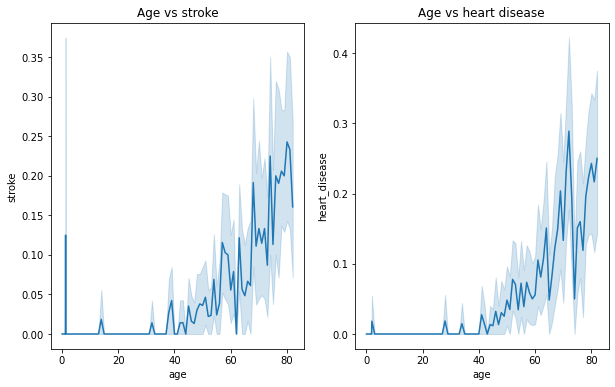

In [10]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.lineplot(x=df['age'],y=df['stroke'])
plt.title('Age vs stroke')

plt.subplot(1,2,2)
sns.lineplot(x=df['age'],y=df['heart_disease'])
plt.title('Age vs heart disease')

Text(0.5, 1.0, 'Age vs heart disease')

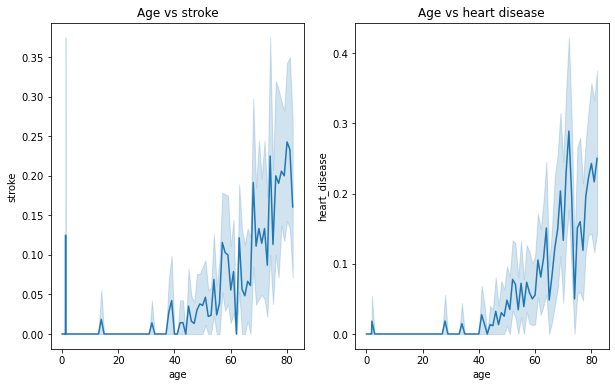

In [11]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.lineplot(x=df['age'],y=df['stroke'])
plt.title('Age vs stroke')

plt.subplot(1,2,2)
sns.lineplot(x=df['age'],y=df['heart_disease'])
plt.title('Age vs heart disease')

<h3><b>Hypertension comparison with Stroke

Text(0.5, 1.0, 'Hypertension and stroke')

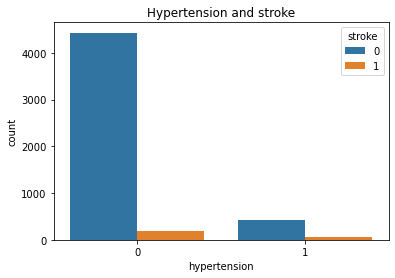

In [12]:
sns.countplot(x=df['hypertension'],hue=df['stroke'])
plt.title('Hypertension and stroke')

<h3><b>Smoking Comparison

<AxesSubplot:ylabel='smoking_status'>

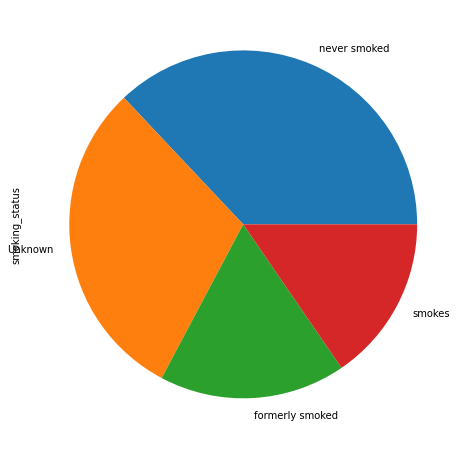

In [13]:
plt.figure(figsize=(8,8))
df['smoking_status'].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Smoking vs heart disease')

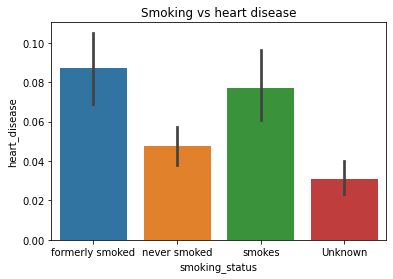

In [14]:
sns.barplot(x=df['smoking_status'],y=df['heart_disease'])
plt.title("Smoking vs heart disease")

<h3><b>BMI Comparison

Text(0.5, 1.0, 'bmi vs heart disease')

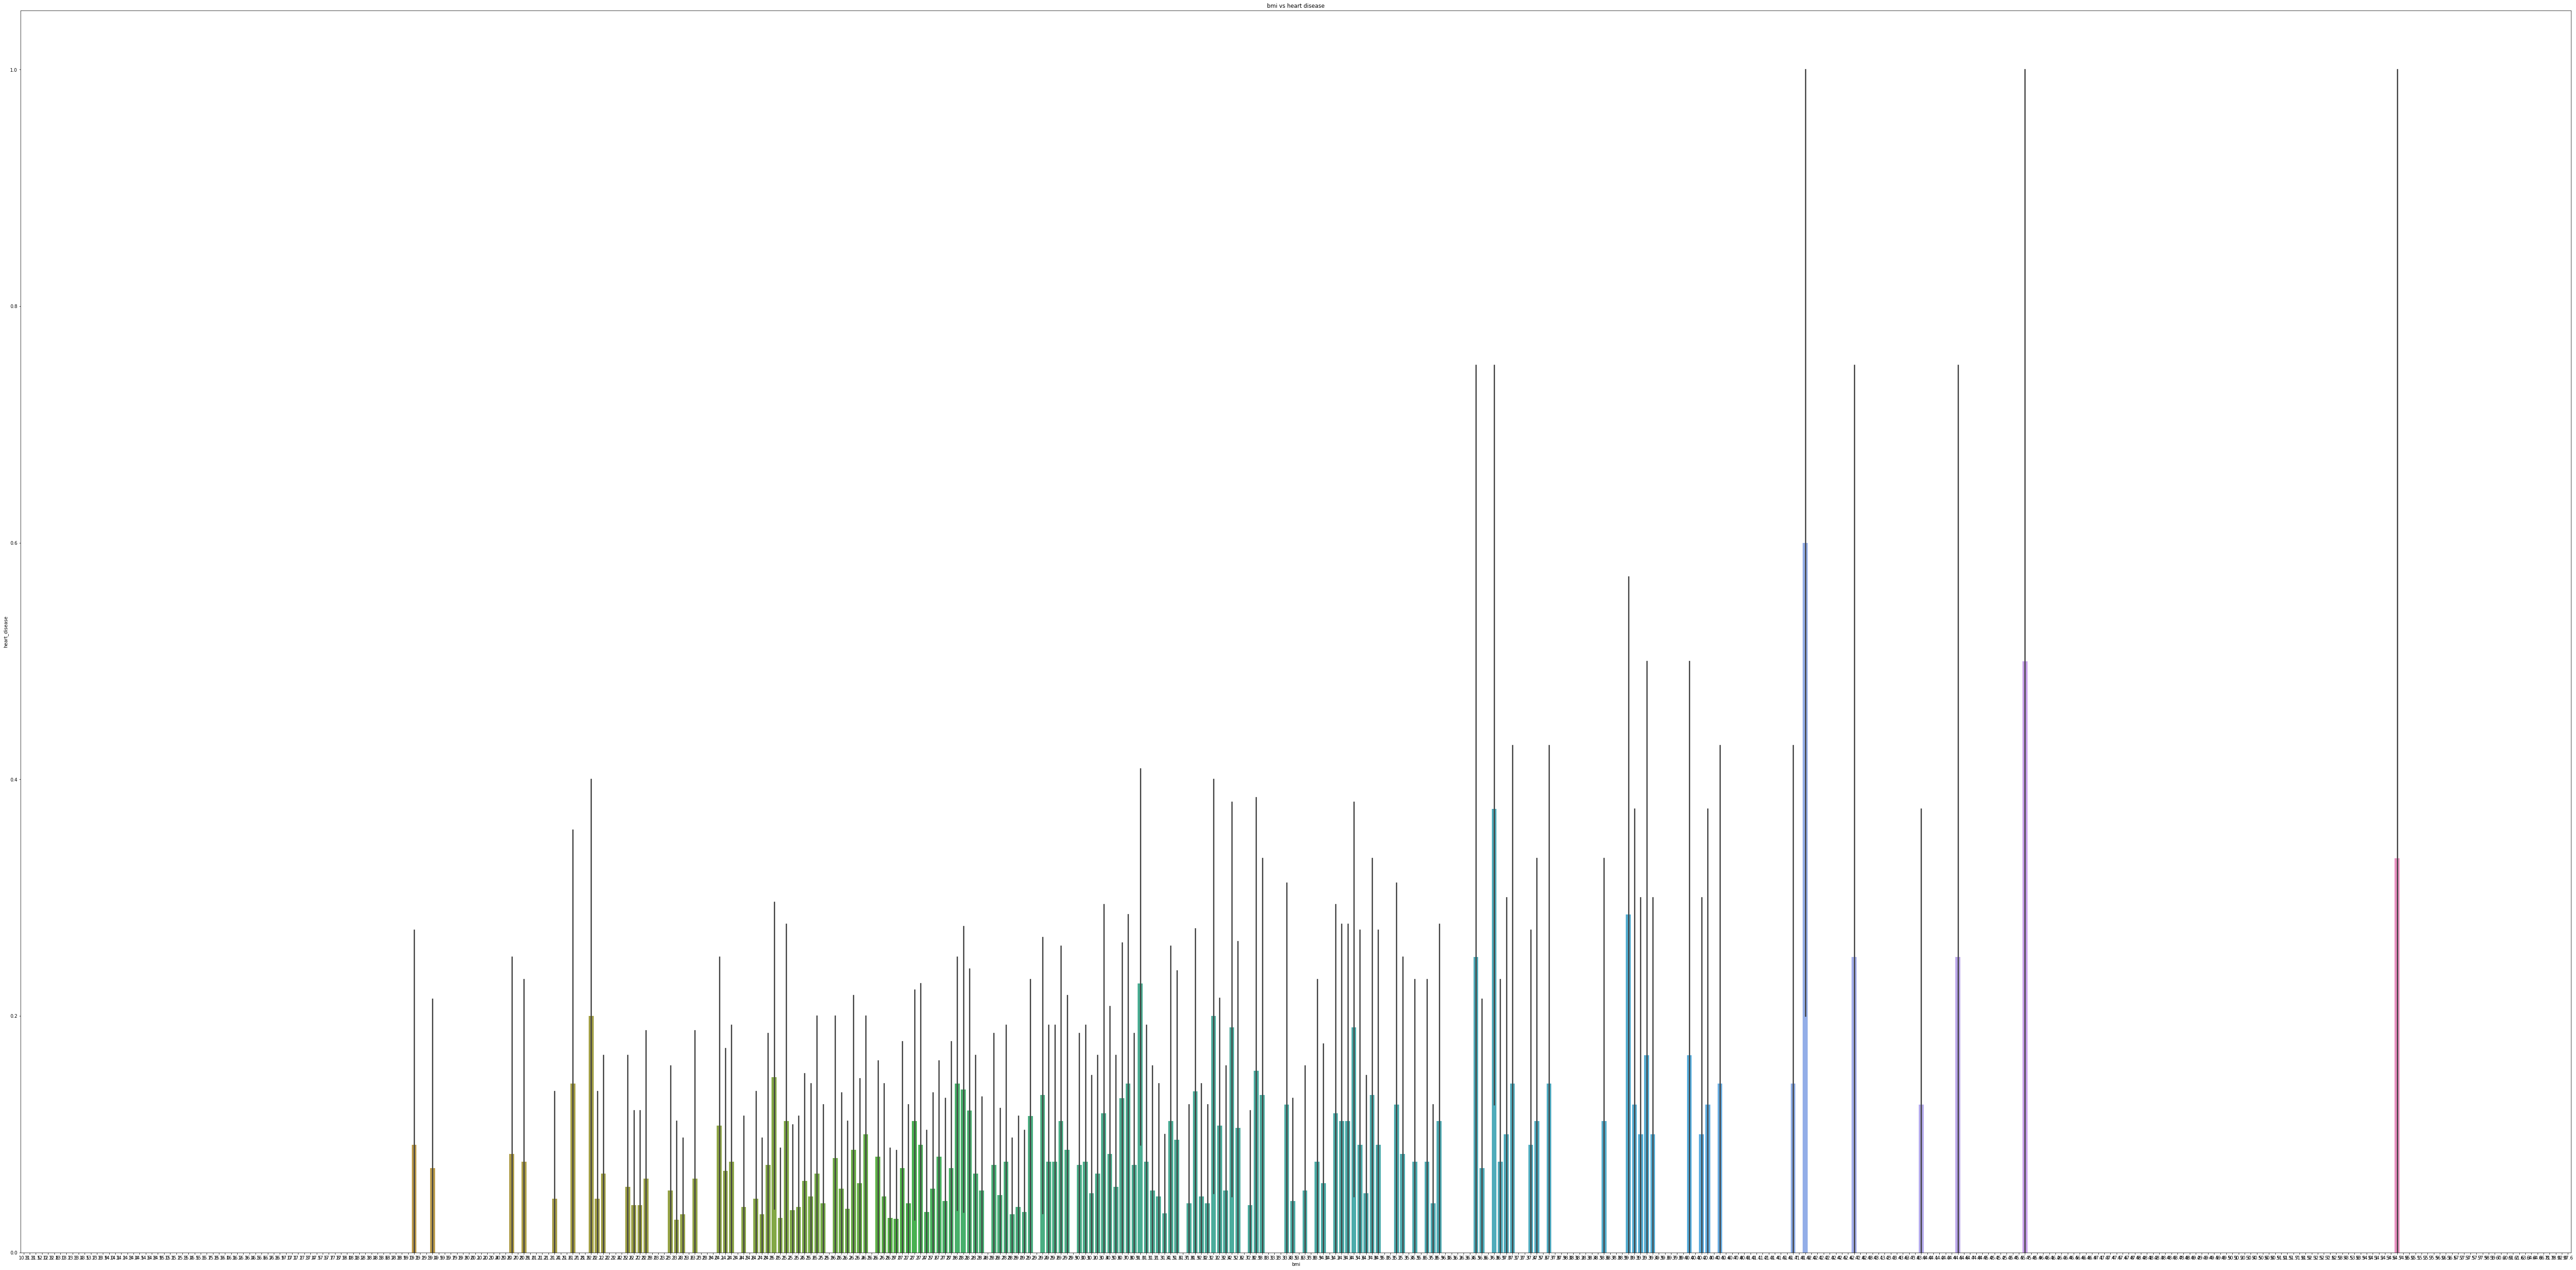

In [15]:
plt.figure(figsize=(100,50))
sns.barplot(x=df['bmi'],y=df['heart_disease'])
plt.title('bmi vs heart disease')

Text(0.5, 1.0, 'bmi vs stroke')

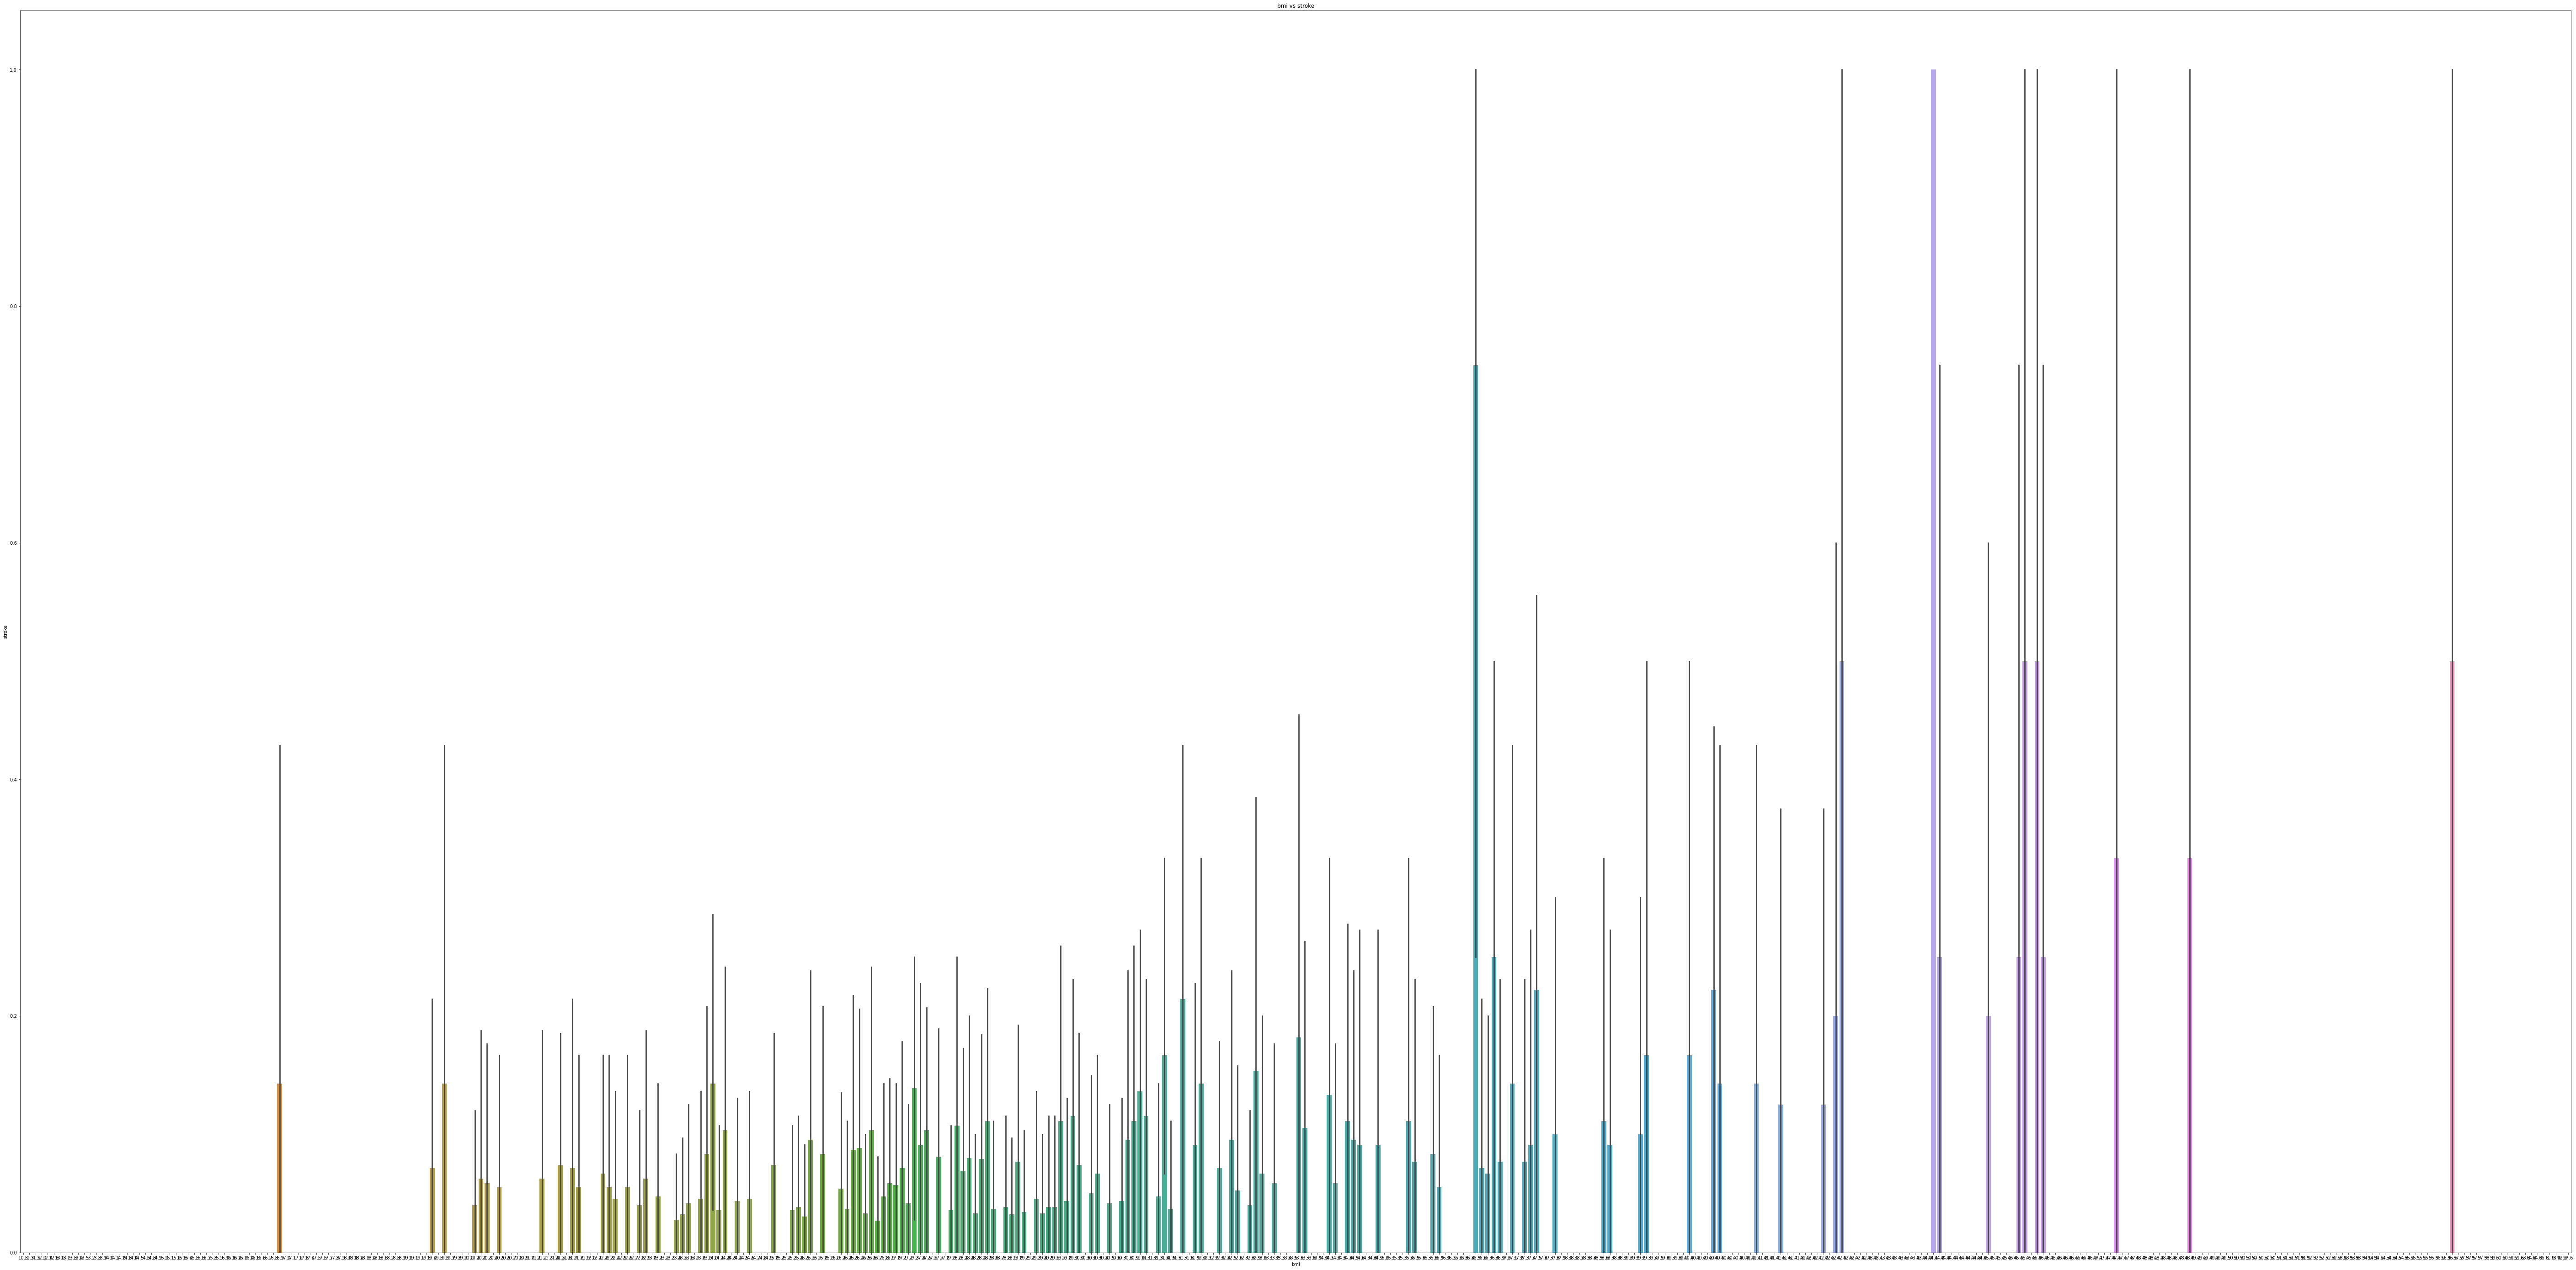

In [16]:
plt.figure(figsize=(100,50))
sns.barplot(x=df['bmi'],y=df['stroke'])
plt.title('bmi vs stroke')

<h3><b>Residence and Work Type Comparison

Text(0.5, 1.0, 'Work_type vs stroke')

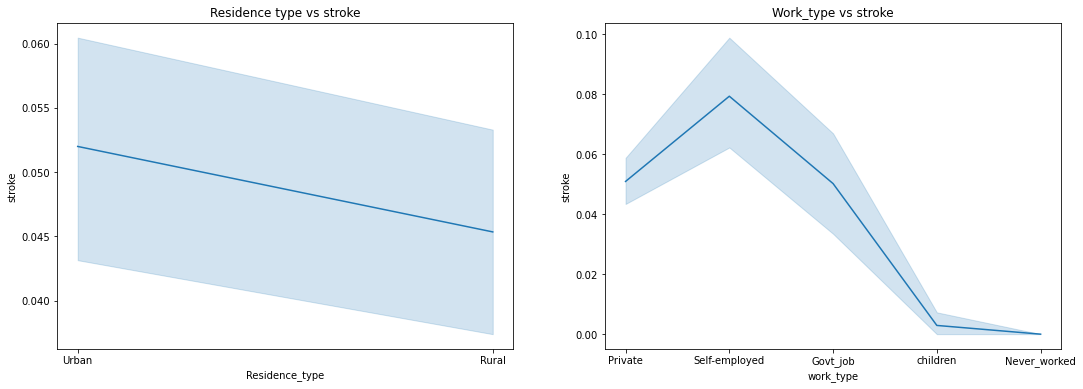

In [17]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.lineplot(x=df['Residence_type'],y=df['stroke'])
plt.title("Residence type vs stroke")

plt.subplot(1,2,2)
sns.lineplot(x=df['work_type'],y=df['stroke'])
plt.title("Work_type vs stroke")

<h3><b>Marital Status Comparison

Text(0.5, 1.0, 'Married vs stroke')

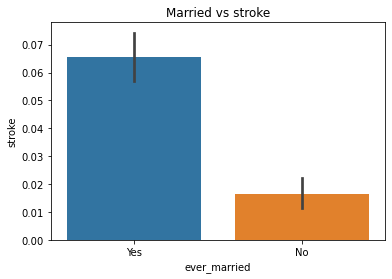

In [18]:
sns.barplot(x=df['ever_married'],y=df['stroke'])
plt.title('Married vs stroke')

<h2><b>Processing the Data

<h3><b>Missing Value Modification

In [19]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<h3><b>Feature Modification

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['smoking_status'])
df['smoking_status'] = le.transform(df['smoking_status'])

le.fit(df['work_type'])
df['work_type'] = le.transform(df['work_type'])

le.fit(df['Residence_type'])
df['Residence_type'] = le.transform(df['Residence_type'])

le.fit(df['ever_married'])
df['ever_married'] = le.transform(df['ever_married'])

le.fit(df['gender'])
df['gender'] = le.transform(df['gender'])

In [23]:
df.drop(['avg_glucose_level','id'],axis=1,inplace=True)

In [24]:
from sklearn.utils import resample,shuffle

zero =df[df['stroke']==0]
one = df[df['stroke']==1]

upsampled1 = resample(one, replace=True, n_samples=zero.shape[0])

df = pd.concat([zero,upsampled1])

df = shuffle(df)

<AxesSubplot:ylabel='stroke'>

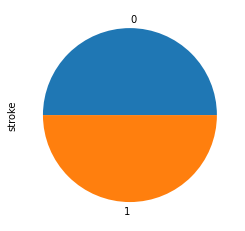

In [25]:
df['stroke'].value_counts().plot(kind='pie')

In [26]:
x = df.drop(['stroke'],axis=1)
y = df['stroke']

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=101)

<h2><b>Model Building

<h3><b>Logistic Regression Implementation

<AxesSubplot:>

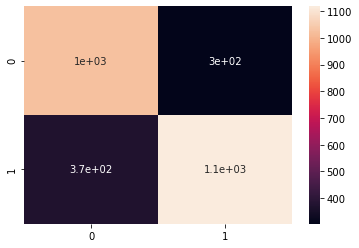

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

lg = LogisticRegression(max_iter=450)
lg.fit(x_train,y_train)
lg_predict = lg.predict(x_test)
lg_cm = confusion_matrix(lg_predict,y_test)
sns.heatmap(lg_cm,annot=True)

In [29]:
accuracy_score(y_test,lg_predict)*100

76.06382978723404

<h3><b>K-Nearest Neighbour Classification Implementation

<AxesSubplot:>

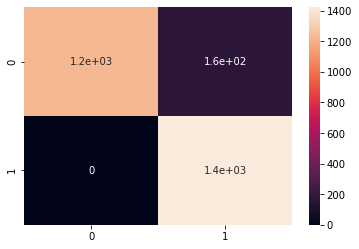

In [30]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=4)
kn.fit(x_train,y_train)
kn_predict = kn.predict(x_test)
kn_cm = confusion_matrix(y_test,kn_predict)
sns.heatmap(kn_cm,annot=True)

In [31]:
accuracy_score(y_test,kn_predict)*100

94.14893617021278

<h3><b>Decision Tree Implementation

<AxesSubplot:>

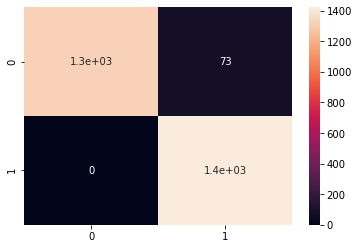

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_cm = confusion_matrix(y_test,dt_predict)
sns.heatmap(dt_cm,annot=True)

In [33]:
accuracy_score(y_test,dt_predict)*100

97.41134751773049

<h3><b>Random Forest Implementation

<AxesSubplot:>

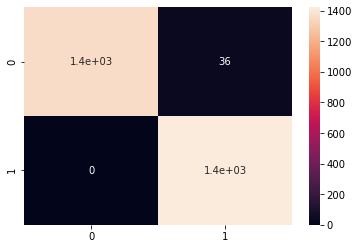

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)
rf_cm = confusion_matrix(y_test,rf_predict)
sns.heatmap(rf_cm,annot=True)

In [35]:
accuracy_score(y_test,rf_predict)*100

98.72340425531915

<h3><b>Support Vector Classifier Implementation

<AxesSubplot:>

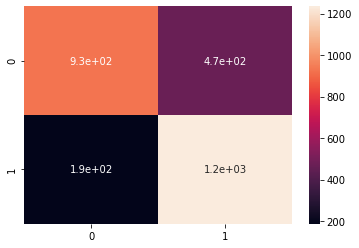

In [36]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
svm_predict = svm.predict(x_test)
svm_cm = confusion_matrix(y_test,svm_predict)
sns.heatmap(svm_cm,annot=True)

In [37]:


accuracy_score(y_test,svm_predict)*100



76.70212765957447

<h3><b>Naive Bayes Implementation

<AxesSubplot:>

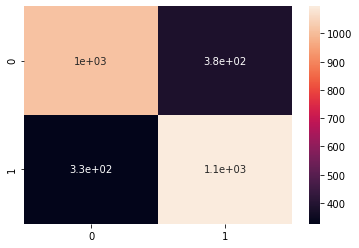

In [38]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict = nb.predict(x_test)
sns.heatmap(confusion_matrix(y_test,nb_predict),annot=True)

In [39]:
accuracy_score(y_test,nb_predict)*100

74.7872340425532

<h2><b>Conclusion